In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [12]:
data,y = make_blobs(n_samples=1000,n_features=2,centers=4,cluster_std=0.5)

In [13]:
data

array([[-6.44845674,  2.95832181],
       [-7.83592125, -7.04618467],
       [ 4.54823106, -5.66989084],
       ...,
       [-8.58199796, -7.52509916],
       [ 0.4724403 ,  5.62918997],
       [-5.79838357,  2.69443347]])

In [38]:
centroids = data[np.random.choice(range(data.shape[0]),size=(4,))]

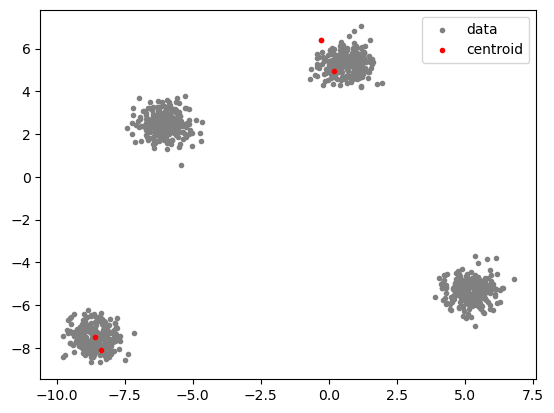

In [41]:
plt.scatter(data[:,0],data[:,1],marker='.',color='grey',label='data')
plt.scatter(centroids[:,0],centroids[:,1],marker='.',color='red',label='centroid')
plt.legend()

In [42]:
data

array([[-6.44845674,  2.95832181],
       [-7.83592125, -7.04618467],
       [ 4.54823106, -5.66989084],
       ...,
       [-8.58199796, -7.52509916],
       [ 0.4724403 ,  5.62918997],
       [-5.79838357,  2.69443347]])

In [91]:
centroids

array([[-8.3691214 , -8.11349051],
       [-0.29787931,  6.3894976 ],
       [ 0.18118788,  4.96318769],
       [-8.58528931, -7.48512767]])

In [49]:
centroids[0]

array([-8.3691214 , -8.11349051])

In [48]:
((data[0] - centroids[0])**2)**0.5

array([ 1.92066467, 11.07181232])

In [56]:
d = ((((data - centroids[0])**2).sum(axis=1))**0.5).reshape(-1,1)

In [103]:
def euclidian(data,centroid):
    dist = np.array([]).reshape(len(data),0)
    for c in centroids:
        distance = (((data - c)**2).sum(axis=1)**0.5).reshape(-1,1)
        dist = np.hstack([dist,distance])
    return dist

def get_closest_centroid(data,centroid):
    dist = euclidian(data,centroid)
    closes_indx = np.argmin(dist,axis=1)
    return closes_indx

In [88]:
dist = get_closest_centroid(data,centroids)

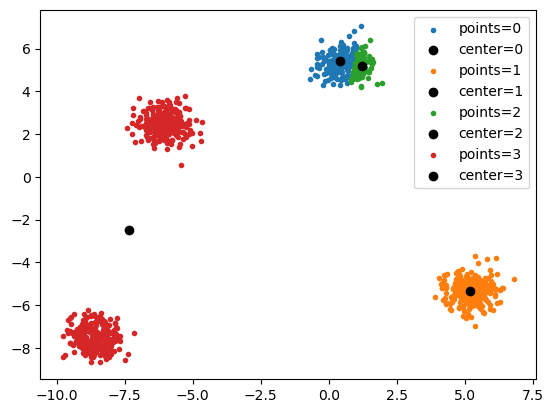

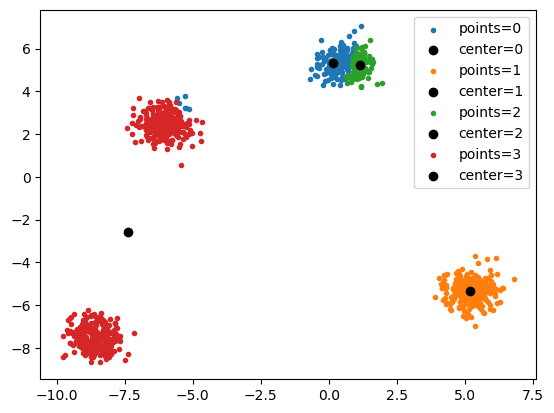

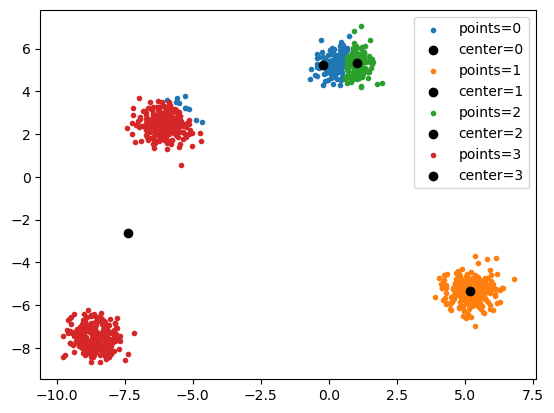

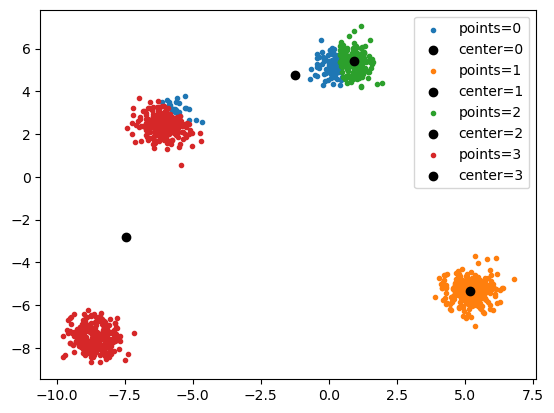

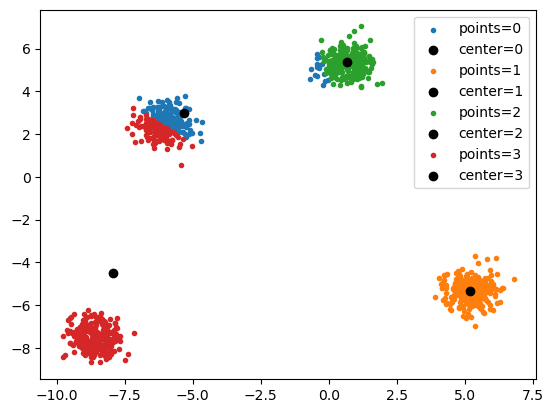

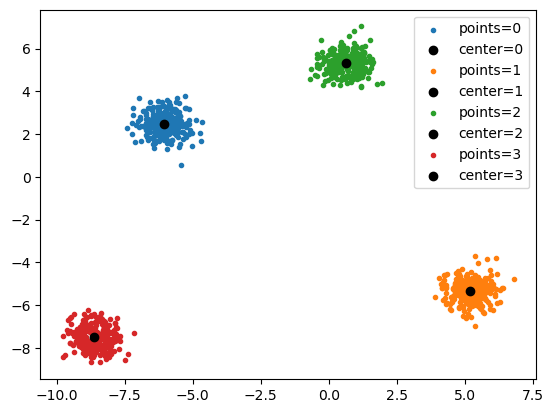

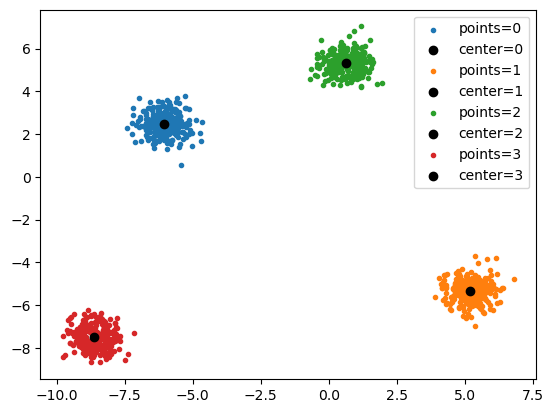

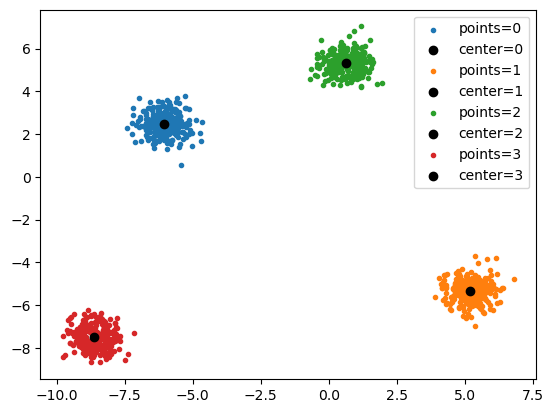

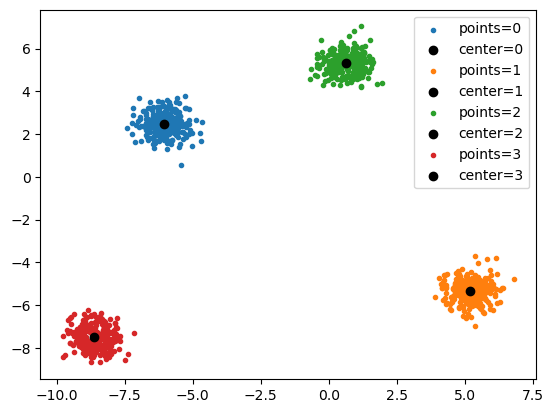

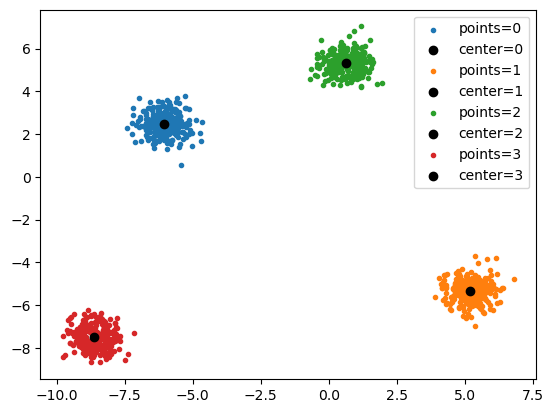

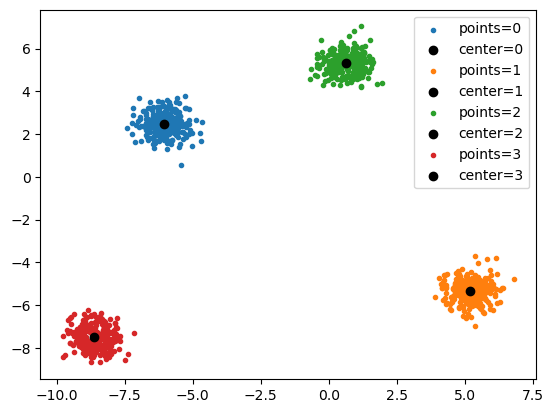

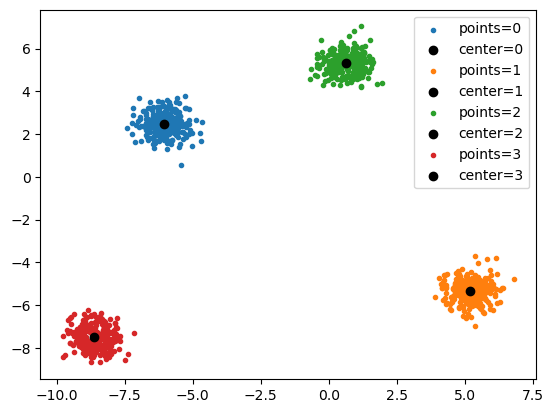

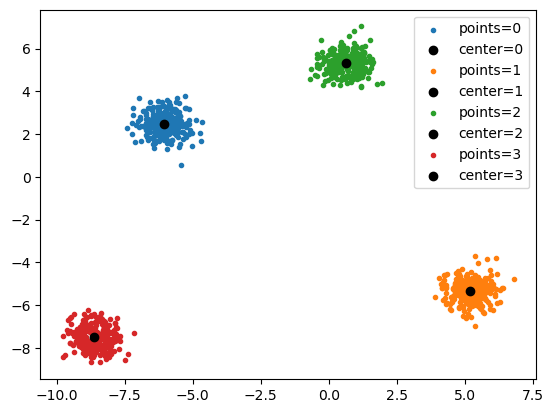

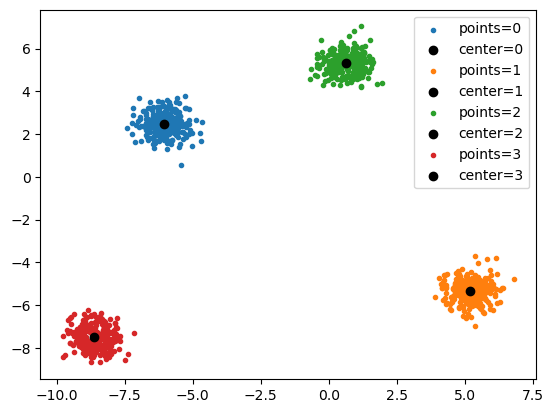

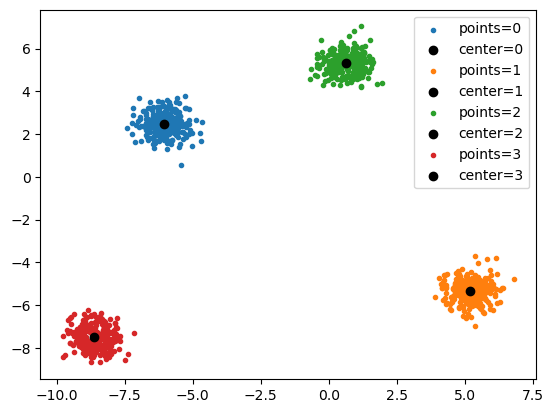

In [104]:
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)

for n in range(15):
    closest_centroid = get_closest_centroid(data,centroids)
    
    assigned_centroid = closest_centroid
    
    for c in range(len(centroids)):
        cluster_data = data[assigned_centroid==c]
        new_centroid = cluster_data.mean(axis=0)
        centroids[c] = new_centroid
        
        plt.scatter(cluster_data[:,0],cluster_data[:,1],marker='.',label = f'points={c}')
        plt.scatter(centroids[c][0],centroids[c][1],color='black',label = f'center={c}')
    plt.legend()
    plt.show()